# Importing libraries

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_curve,auc,roc_auc_score

# loading Data

In [2]:
data = pd.read_csv("parkinsons.csv")

# Explioratary data analysis(EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
data.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [5]:
print(data.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [6]:
# finding the shape of dataset 
data.shape

(195, 24)

In [7]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

# data visualization

<Axes: ylabel='status'>

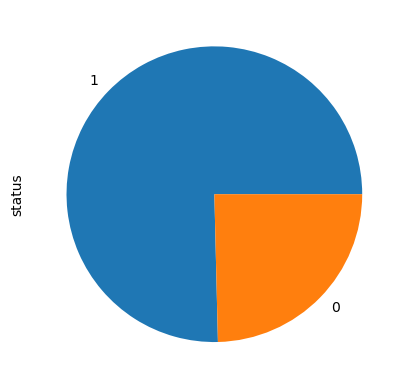

In [8]:
data.status.value_counts().plot(kind ='pie')

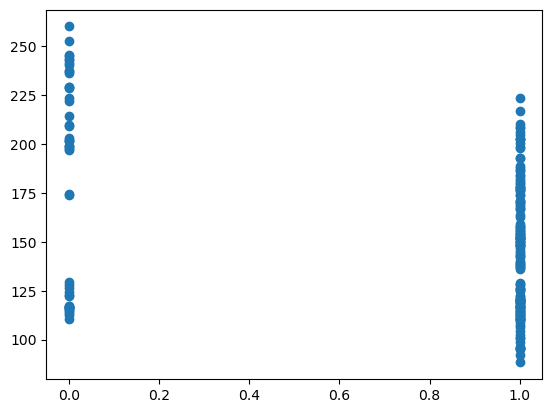

In [9]:
plt.scatter(data["status"], data["MDVP:Fo(Hz)"])
plt.show()

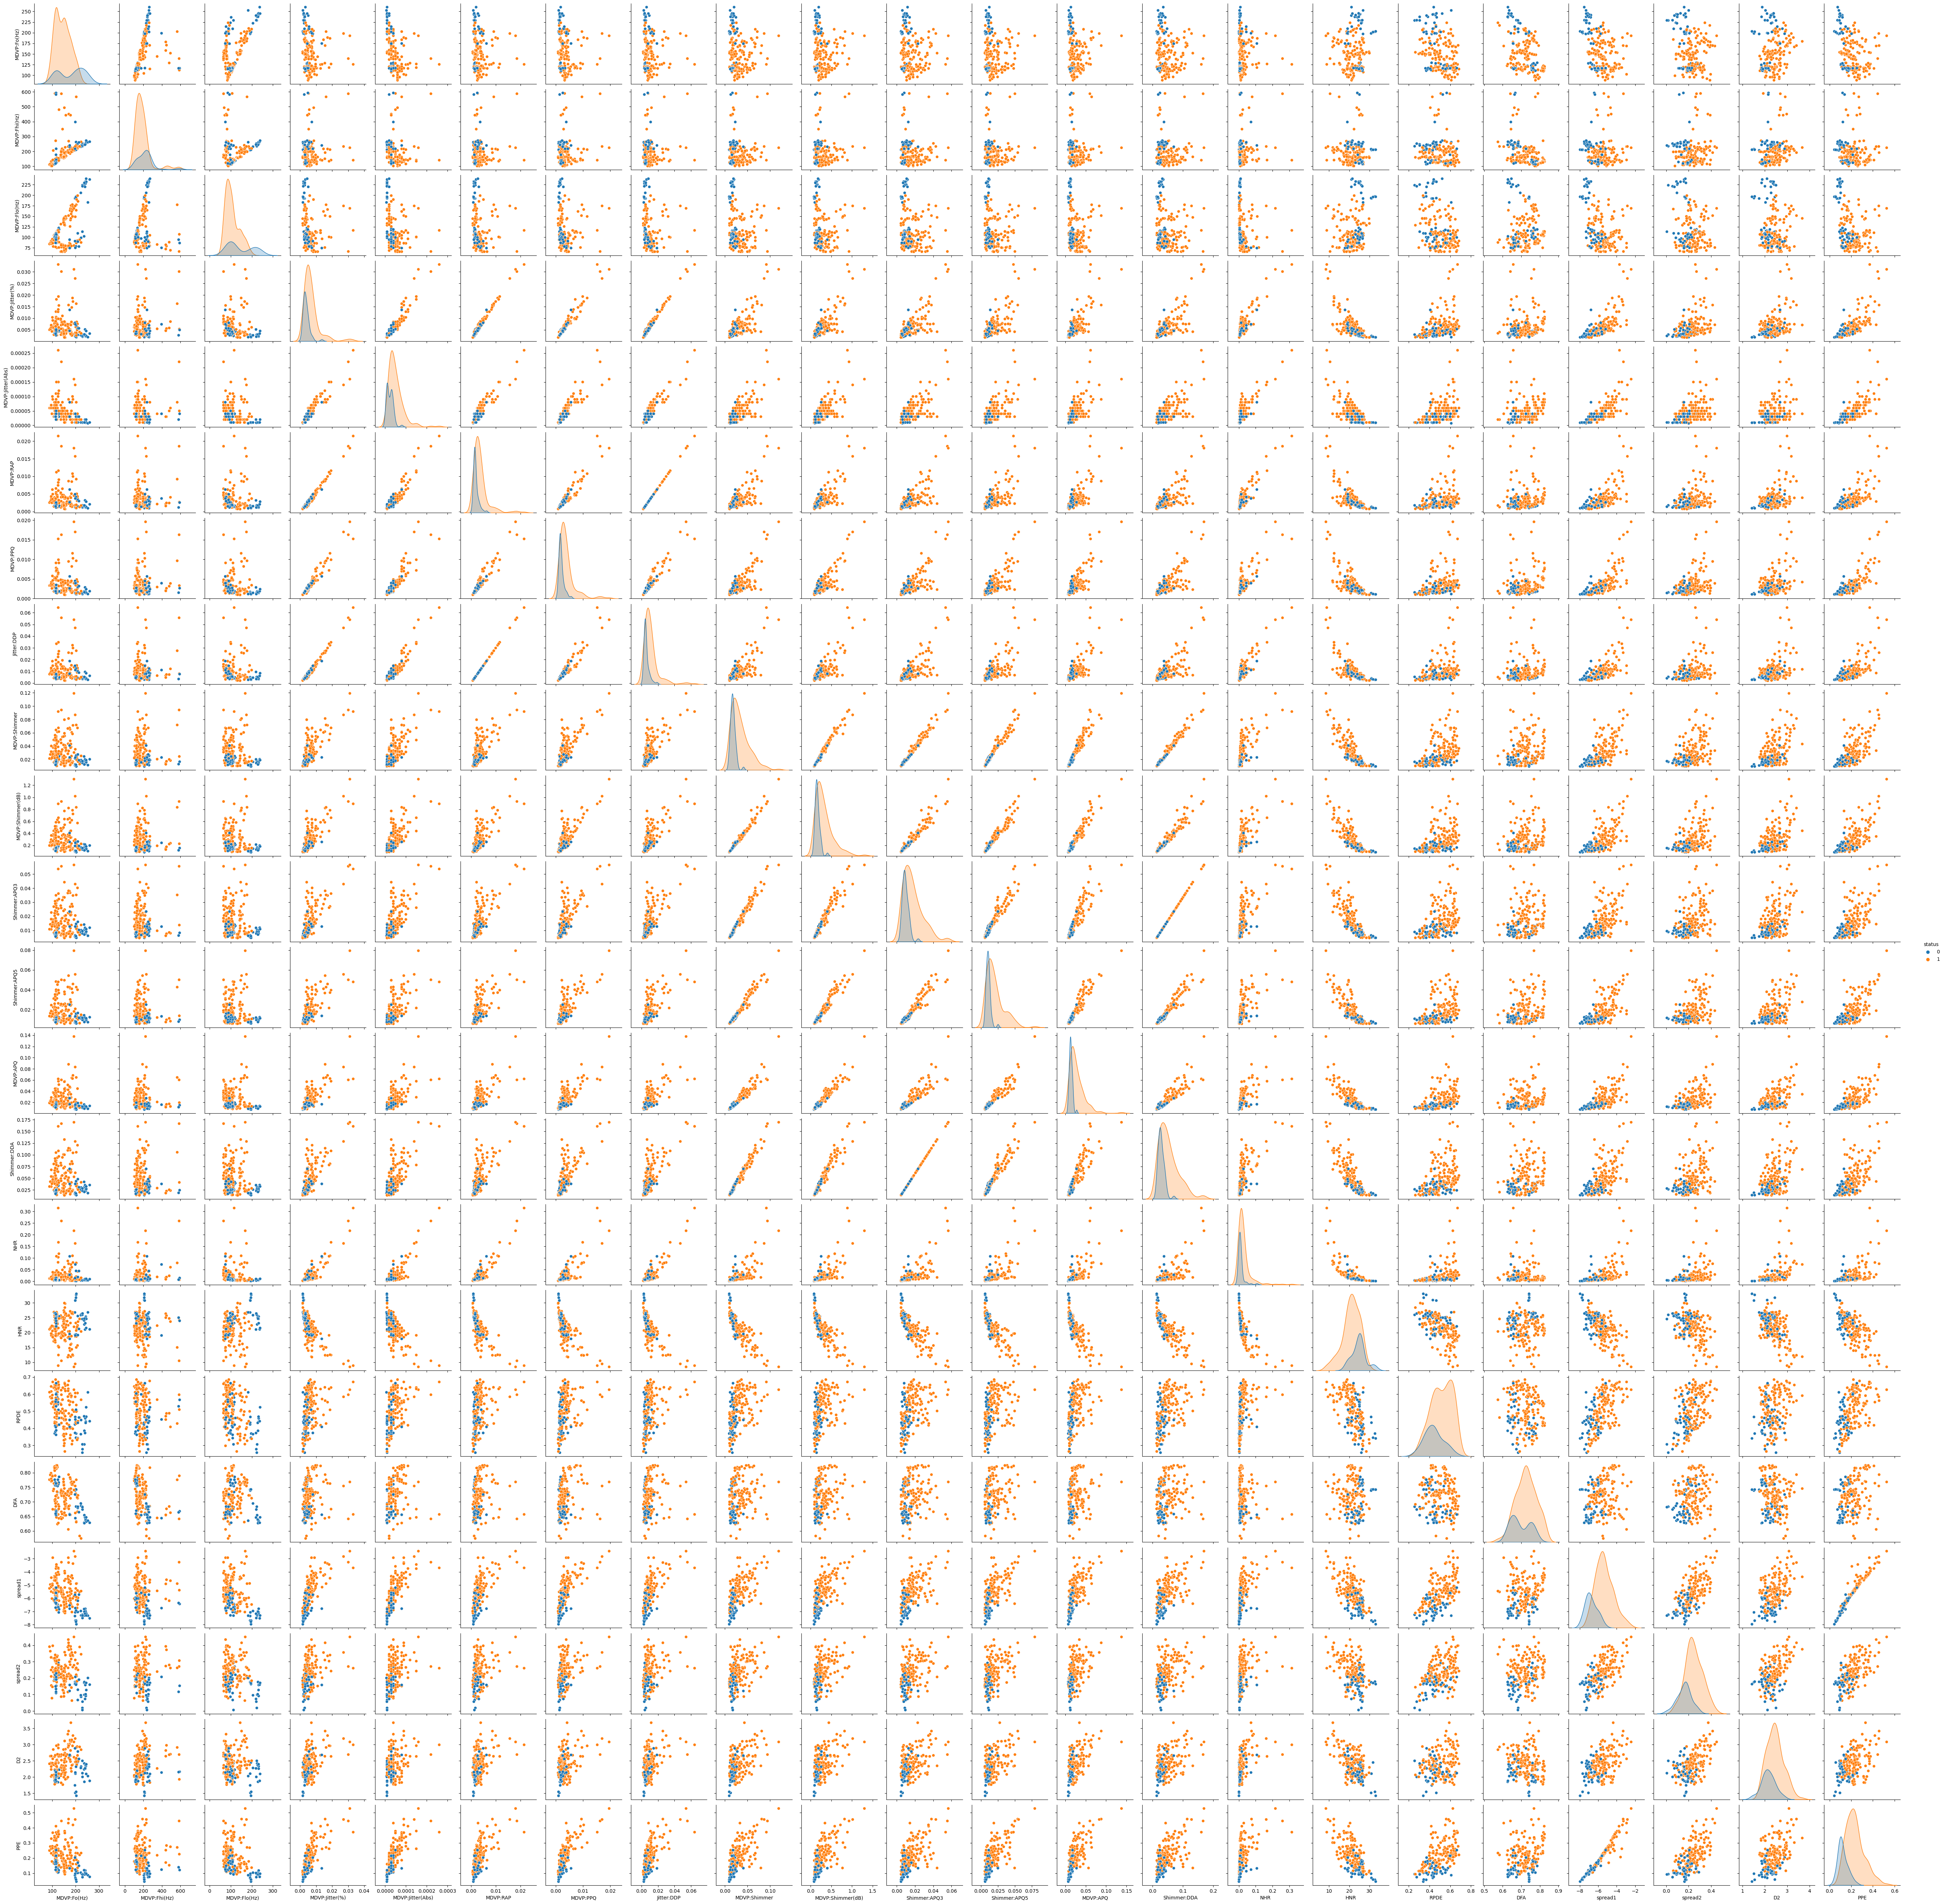

In [81]:
sns.pairplot(data,diag_kind='kde', hue='status')
plt.show()

# spliting of data

In [10]:
x = data.drop("status" , axis = 1)
x = x.drop("name" , axis = 1)
y = data["status"]

Text(0.5, 0, '0 = No Disease, 1 = Disease')

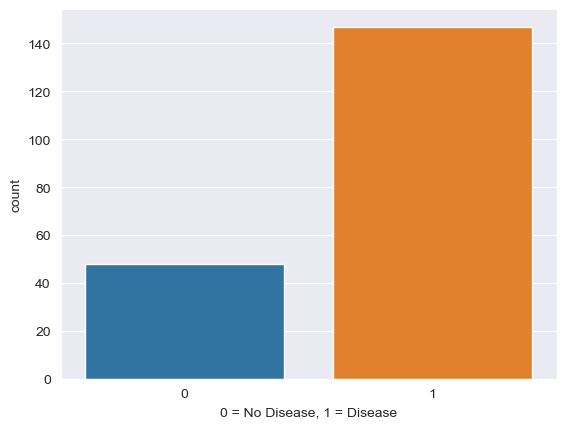

In [11]:
sns.set_style('darkgrid')
figsize=(20, 16)
sns.countplot(x='status',data=data)
plt.xlabel("0 = No Disease, 1 = Disease")

found data inbance in the effected and not effected samples , so lets balance the imbalance of dataset using SMOTE enn technique

# SMOTE enn

In [19]:
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
smote_enn = SMOTEENN()
X_res1, y_res1 = smote_enn.fit_resample(x, y)
X_res1.shape, y_res1.shape
y_res1.value_counts()

0    113
1    107
Name: status, dtype: int64

# feature selection
feature selection using select k-best and using chi-square test , and selecting top 20 features

In [20]:
x = X_res1.abs()
y = y_res1 
feature_names = x.columns
k = 20  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(x, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Map selected feature indices to their corresponding names
selected_feature_names = [feature_names[i] for i in selected_features_indices]

print("Selected feature names:", selected_feature_names)

Selected feature names: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [21]:
x = x[selected_feature_names]

# train , test split

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 47)

# metrics 

In [23]:
def metrics( y_pred_prob , y_true):
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # Other metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(cm)

# hyperparameter tunning of classifiers

In [24]:
param_dist = {
    "n_neighbors": range(1, 21),
    "metric": ["euclidean", "cityblock"],
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier()
rand_search = RandomizedSearchCV(knn, param_dist, n_iter=50, cv=5)
rand_search.fit(x_train, y_train)
best_params_knn = rand_search.best_params_

time taken =  0.05048346519470215


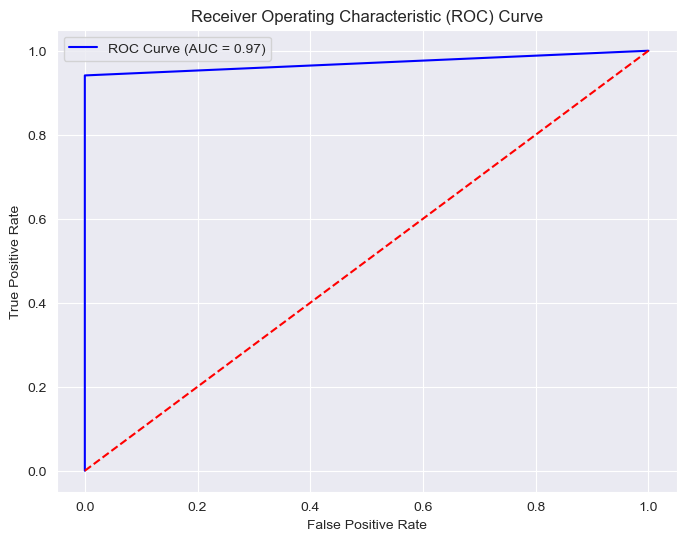

Accuracy: 0.9772727272727273
Precision: 1.0
Recall: 0.9411764705882353
F1 Score: 0.9696969696969697
Confusion Matrix:
[[27  0]
 [ 1 16]]


In [25]:
s = time.time()
knn = KNeighborsClassifier(**best_params_knn)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
e = time.time()
print("time taken = " , e-s)
metrics(y_pred, y_test )

In [26]:
from scipy.stats import randint
start = time.time()
param_dist = {
    'n_estimators': randint(10, 100),  # Number of trees in the forest
    'max_depth': randint(3, 10),         # Maximum depth of the trees
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),   # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

rf_classifier = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

random_search.fit(x_train, y_train)
end = time.time()
params_RF = random_search.best_params_
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
print(end - start)

Best Parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 61}
Best Score: 0.9887301587301588
36.66123962402344


time taken  0.11131000518798828


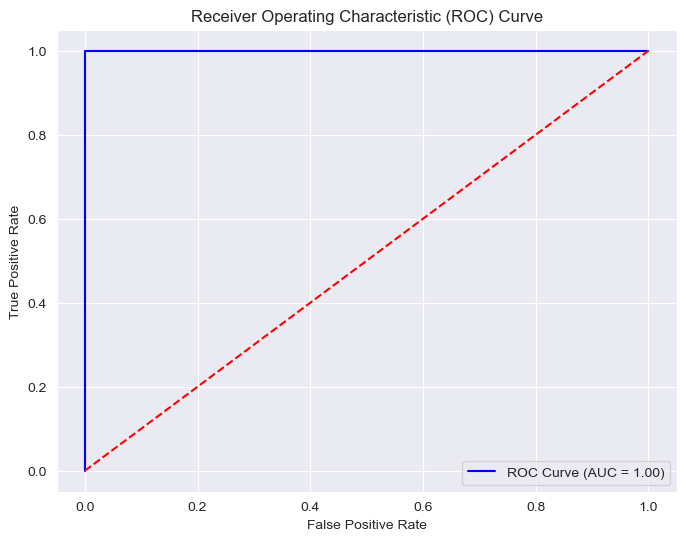

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[27  0]
 [ 0 17]]


In [27]:
# random forest 
s = time.time()
rd = RandomForestClassifier(**params_RF)
rd.fit(x_train, y_train)
y_pred = rd.predict(x_test)
e = time.time()
print("time taken " , e-s)
metrics(y_pred , y_test)

In [28]:
from scipy.stats import randint
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [ 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Instantiate decision tree classifier
tree = DecisionTreeClassifier()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=100)

# Fit random search
random_search.fit(x, y)

params_dt = random_search.best_params_
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 2}
Best Score: 0.9363636363636363


time taken  0.0


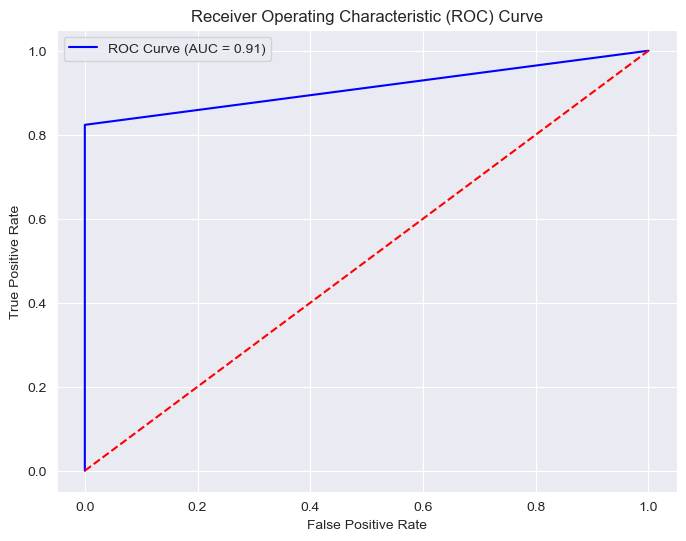

Accuracy: 0.9318181818181818
Precision: 1.0
Recall: 0.8235294117647058
F1 Score: 0.9032258064516129
Confusion Matrix:
[[27  0]
 [ 3 14]]


In [38]:
s = time.time()
dt = DecisionTreeClassifier(** params_dt)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
e = time.time()
print("time taken " , e-s)
metrics(y_pred , y_test)